# Spotify Analysis Report
By TJ Laryea
November 21st, 2023

For my analysis report, I decided to pick two albums that are considered hip-hop or pop albums. I chose Sunset Diner by Kid Quill and Glory Sound Prep by Jon Bellion. I found these albums at the height of the pandemic, and they became the soundtrack to my year. To this day, I have many songs from these albums in my playlist rotations as they are significant to my life. The songs are all catchy and upbeat and remind me of the good times of the pandemic, but they also have emotional aspects that bring me back to the grim times of the pandemic. They serve as a reminder of the two sides of life we have, so I figured I should do them for this project!

## Setting up the Project
Below are the code cells I need to access the Spotify API and actual carrry out the project

In [1]:
import pandas as pd
import requests as rq
import base64
import json
import urllib
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats
#Importing all the different python modules I need to execute this project

In [2]:
Client_ID = pd.read_csv('Spotify_Keys.txt')['Client_ID'].iloc[0]

In [3]:
Client_Secret = pd.read_csv('Spotify_Keys.txt')['Client_Secret'].iloc[0]

In [4]:
#Client_ID

In [5]:
clientCred = base64.b64encode(str(Client_ID + ":"+ Client_Secret).encode("ascii"))

In [6]:
headers = {"Authorization": "Basic {}".format (clientCred.decode("ascii"))}

In [7]:
payload = {'grant_type' : 'client_credentials'}
url = 'https://accounts.spotify.com/api/token'

In [8]:
sessionKeyResponse = rq.post(url = url, data = payload, headers = headers)

In [9]:
sessionKeyResponse.status_code

200

In [10]:
accessKey = sessionKeyResponse.json()["access_token"]

In [11]:
sessionHeaders = {"Authorization": "Bearer {}".format(accessKey)}

# Calling the Spotify API

<img src = "https://i.scdn.co/image/ab67616d0000b2733429762fb9263d7469f24ef5" style="width:300px;height:300px;"> 
<h2 style = "text-align:center">Sunset Diner by Kid Quill</h2>

In [12]:
sunset_id = "30tpNsvnkcKtPgvQvRdIlj"
# The Album ID for Sunset Diner

In [13]:
sunset_tracks_api = "https://api.spotify.com/v1/albums/{}/tracks".format(sunset_id) 
#Setting up the URL I will use to call the API to get the album's tracks
sunset_tracks = rq.get(sunset_tracks_api, headers = sessionHeaders)
#Actually calling the API and recieving back the album track list as a JSON file
print(sunset_tracks.status_code)
sunset_dict = json.loads(sunset_tracks.text)
#Creating a dictionary that we can use to access the Track IDs using list comprehension
sunset_track_ids = [x['id'] for x in sunset_dict['items']]
#Pulling the track IDs from the JSON dictionary and placing them in a list.
sunset_track_strings = ','.join(str(x) for x in sunset_track_ids)
# Creating a list of comma separated IDs that we can send to the Spotify API that we can then get the audio features
print(sunset_track_strings)
sunset_features_endpoint = "https://api.spotify.com/v1/audio-features?ids={}".format(sunset_track_strings)

200
31RQhRiOBNvQmevxxMHygN,4HdxTnnmhT1esLQXjiySoZ,3IRbFbA0YaZfRkpZfvbr67,22t4u4Zyx9kRM6ADyFpWiN,3QI0olkcV0QLzvPOPCRbq6,1kkoUFYEPJK5e6FdWs4mmt,5LYXMp7S22Esmq9XQ0s5mf,3ZgpaSKaPIorKIAJXC3CVp,0EDwLwJ3aIpwDohlzh9yOG,6d9vT5odpbcs4KS0DDgQjG,4gOW9dBdqcyhJk953Txx6x,0OR9pBQOkb4F5rurZAcMUU,36qabN42JiTfVqytNhCh0x


In [14]:
sunset_features = rq.get(sunset_features_endpoint, headers = sessionHeaders)
sunset_features.status_code
# This code block is requesting the audio features from the API

200

In [15]:
sunset_dict = json.loads(sunset_features.text)
sunset_df = pd.DataFrame(sunset_dict['audio_features'])
sunset_df
# This code block is loading the JSON file from the Spotify API with audio features and then placing it into a Pandas
# That I can call to access said features

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.590,0.651,6,-6.819,1,0.0407,0.6120,0.000143,0.103,0.357,125.921,audio_features,31RQhRiOBNvQmevxxMHygN,spotify:track:31RQhRiOBNvQmevxxMHygN,https://api.spotify.com/v1/tracks/31RQhRiOBNvQ...,https://api.spotify.com/v1/audio-analysis/31RQ...,162437,4
1,0.758,0.648,7,-8.394,1,0.2300,0.8530,0.000038,0.188,0.630,97.978,audio_features,4HdxTnnmhT1esLQXjiySoZ,spotify:track:4HdxTnnmhT1esLQXjiySoZ,https://api.spotify.com/v1/tracks/4HdxTnnmhT1e...,https://api.spotify.com/v1/audio-analysis/4Hdx...,163081,4
2,0.433,0.772,5,-5.262,1,0.0959,0.2100,0.388000,0.174,0.823,171.959,audio_features,3IRbFbA0YaZfRkpZfvbr67,spotify:track:3IRbFbA0YaZfRkpZfvbr67,https://api.spotify.com/v1/tracks/3IRbFbA0YaZf...,https://api.spotify.com/v1/audio-analysis/3IRb...,311873,4
3,0.529,0.803,11,-5.530,0,0.0957,0.3910,0.031700,0.460,0.324,104.940,audio_features,22t4u4Zyx9kRM6ADyFpWiN,spotify:track:22t4u4Zyx9kRM6ADyFpWiN,https://api.spotify.com/v1/tracks/22t4u4Zyx9kR...,https://api.spotify.com/v1/audio-analysis/22t4...,221321,4
4,0.314,0.689,1,-5.549,1,0.0589,0.0592,0.000127,0.126,0.479,78.982,audio_features,3QI0olkcV0QLzvPOPCRbq6,spotify:track:3QI0olkcV0QLzvPOPCRbq6,https://api.spotify.com/v1/tracks/3QI0olkcV0QL...,https://api.spotify.com/v1/audio-analysis/3QI0...,274182,4
5,0.457,0.747,6,-5.158,1,0.0346,0.3680,0.033000,0.103,0.221,169.097,audio_features,1kkoUFYEPJK5e6FdWs4mmt,spotify:track:1kkoUFYEPJK5e6FdWs4mmt,https://api.spotify.com/v1/tracks/1kkoUFYEPJK5...,https://api.spotify.com/v1/audio-analysis/1kko...,188222,4
6,0.461,0.477,6,-5.215,1,0.0428,0.9940,0.560000,0.131,0.156,93.280,audio_features,5LYXMp7S22Esmq9XQ0s5mf,spotify:track:5LYXMp7S22Esmq9XQ0s5mf,https://api.spotify.com/v1/tracks/5LYXMp7S22Es...,https://api.spotify.com/v1/audio-analysis/5LYX...,71414,4
7,0.557,0.638,8,-8.433,1,0.0519,0.3600,0.876000,0.104,0.382,165.905,audio_features,3ZgpaSKaPIorKIAJXC3CVp,spotify:track:3ZgpaSKaPIorKIAJXC3CVp,https://api.spotify.com/v1/tracks/3ZgpaSKaPIor...,https://api.spotify.com/v1/audio-analysis/3Zgp...,185136,4
8,0.589,0.695,7,-5.645,1,0.0334,0.4270,0.074600,0.695,0.582,133.990,audio_features,0EDwLwJ3aIpwDohlzh9yOG,spotify:track:0EDwLwJ3aIpwDohlzh9yOG,https://api.spotify.com/v1/tracks/0EDwLwJ3aIpw...,https://api.spotify.com/v1/audio-analysis/0EDw...,239506,4
9,0.382,0.404,3,-11.961,1,0.1030,0.8400,0.006760,0.271,0.644,79.970,audio_features,6d9vT5odpbcs4KS0DDgQjG,spotify:track:6d9vT5odpbcs4KS0DDgQjG,https://api.spotify.com/v1/tracks/6d9vT5odpbcs...,https://api.spotify.com/v1/audio-analysis/6d9v...,75878,1


<img src = "https://upload.wikimedia.org/wikipedia/en/a/ae/Jon_Bellion_-_Glory_Sound_Prep.png">
<h2 style = "text-align:center">Glory Sound Prep by Jon Bellion</h2>


In [16]:
gsp_id = "59YYObx9wFEFG5zVdlfwvf"

In [17]:
gsp_tracks_api = "https://api.spotify.com/v1/albums/{}/tracks".format(gsp_id)
gsp_tracks = rq.get(gsp_tracks_api, headers = sessionHeaders)
print(gsp_tracks.status_code)
gsp_dict = json.loads(gsp_tracks.text)
gsp_track_ids = [x['id'] for x in gsp_dict['items']]
gsp_track_strings = ','.join(str(x) for x in gsp_track_ids)
print(gsp_track_strings)
gsp_features_endpoint = "https://api.spotify.com/v1/audio-features?ids={}".format(gsp_track_strings)

200
1EAZ0APxPiVuzDb7R5TfVI,1eftOUoeMO1JkSQQmS6jXF,2X1Tygc4uVunRgzNkFb1mG,7cK7hDrE7vAesPf8xd5zmb,359Q4gGdrQIFhRzs7J8gZu,4FUDWkguOUVpLRAVn5C20z,7HKSWfpxHhllSmoLk9AQz8,7pMS0byKI7V1Mpl0SlWEDq,6BbANlpji0u8ZlqyPVMQiM,1SefvAcZtoZo22njnX2qy7


In [18]:
gsp_features = rq.get(gsp_features_endpoint, headers = sessionHeaders)
gsp_features.status_code

200

In [19]:
gsp_dict = json.loads(gsp_features.text)
gsp_df = pd.DataFrame(gsp_dict['audio_features'])
gsp_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.496,0.487,6,-7.003,1,0.0301,0.0222,0.000018,0.638,0.321,138.187,audio_features,1EAZ0APxPiVuzDb7R5TfVI,spotify:track:1EAZ0APxPiVuzDb7R5TfVI,https://api.spotify.com/v1/tracks/1EAZ0APxPiVu...,https://api.spotify.com/v1/audio-analysis/1EAZ...,206210,4
1,0.518,0.587,0,-7.937,1,0.1200,0.0168,0.000001,0.206,0.631,98.367,audio_features,1eftOUoeMO1JkSQQmS6jXF,spotify:track:1eftOUoeMO1JkSQQmS6jXF,https://api.spotify.com/v1/tracks/1eftOUoeMO1J...,https://api.spotify.com/v1/audio-analysis/1eft...,268466,4
2,0.647,0.749,4,-5.056,0,0.4200,0.2900,0.000001,0.126,0.585,91.902,audio_features,2X1Tygc4uVunRgzNkFb1mG,spotify:track:2X1Tygc4uVunRgzNkFb1mG,https://api.spotify.com/v1/tracks/2X1Tygc4uVun...,https://api.spotify.com/v1/audio-analysis/2X1T...,340522,4
3,0.362,0.377,2,-9.713,1,0.0339,0.7320,0.000631,0.127,0.294,137.891,audio_features,7cK7hDrE7vAesPf8xd5zmb,spotify:track:7cK7hDrE7vAesPf8xd5zmb,https://api.spotify.com/v1/tracks/7cK7hDrE7vAe...,https://api.spotify.com/v1/audio-analysis/7cK7...,178176,4
4,0.767,0.792,5,-5.053,0,0.2250,0.1060,0.000010,0.145,0.699,119.168,audio_features,359Q4gGdrQIFhRzs7J8gZu,spotify:track:359Q4gGdrQIFhRzs7J8gZu,https://api.spotify.com/v1/tracks/359Q4gGdrQIF...,https://api.spotify.com/v1/audio-analysis/359Q...,189492,4
5,0.384,0.465,0,-8.554,1,0.0341,0.2900,0.000022,0.359,0.636,131.604,audio_features,4FUDWkguOUVpLRAVn5C20z,spotify:track:4FUDWkguOUVpLRAVn5C20z,https://api.spotify.com/v1/tracks/4FUDWkguOUVp...,https://api.spotify.com/v1/audio-analysis/4FUD...,183344,4
6,0.701,0.828,7,-5.606,1,0.2970,0.2440,0.000000,0.417,0.651,89.988,audio_features,7HKSWfpxHhllSmoLk9AQz8,spotify:track:7HKSWfpxHhllSmoLk9AQz8,https://api.spotify.com/v1/tracks/7HKSWfpxHhll...,https://api.spotify.com/v1/audio-analysis/7HKS...,313897,4
7,0.347,0.672,7,-6.661,1,0.5200,0.0118,0.000154,0.245,0.565,195.225,audio_features,7pMS0byKI7V1Mpl0SlWEDq,spotify:track:7pMS0byKI7V1Mpl0SlWEDq,https://api.spotify.com/v1/tracks/7pMS0byKI7V1...,https://api.spotify.com/v1/audio-analysis/7pMS...,208697,4
8,0.582,0.550,7,-8.474,1,0.0448,0.0122,0.000028,0.128,0.696,94.087,audio_features,6BbANlpji0u8ZlqyPVMQiM,spotify:track:6BbANlpji0u8ZlqyPVMQiM,https://api.spotify.com/v1/tracks/6BbANlpji0u8...,https://api.spotify.com/v1/audio-analysis/6BbA...,227207,4
9,0.271,0.474,0,-9.718,1,0.0498,0.3170,0.000489,0.097,0.362,177.907,audio_features,1SefvAcZtoZo22njnX2qy7,spotify:track:1SefvAcZtoZo22njnX2qy7,https://api.spotify.com/v1/tracks/1SefvAcZtoZo...,https://api.spotify.com/v1/audio-analysis/1Sef...,481590,4


The code above is going through the exact same process for getting the Sunset Diner audio features

## Chosen Audio Features

For this analysis I decided to go with danceability and valence as both albums have happy upbeat songs but they aren't necessarily danceable and the lyrics are more of the focus, so I would love to see the correlation between the two during this analysis.

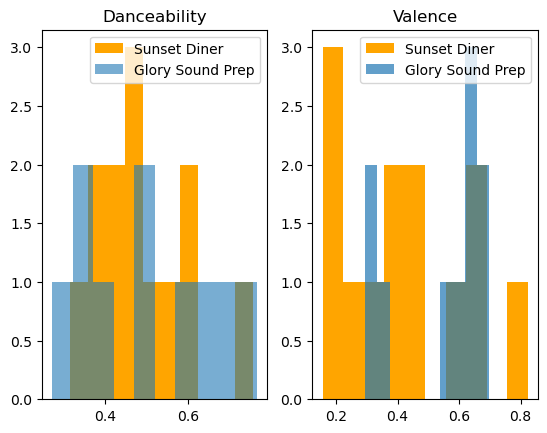

In [20]:
fig1, ax1 = plt.subplots(1,2)
# Creating a figure of charts with 1 row and 2 columns
ax1[0].hist(sunset_df['danceability'], color = "orange", label = "Sunset Diner")
ax1[0].hist(gsp_df['danceability'], label = "Glory Sound Prep", alpha = .6)
# Histograms Plotting the Danceability of the two albums on one histogram

ax1[1].hist(sunset_df['valence'],color = "orange", label = "Sunset Diner")
ax1[1].hist(gsp_df['valence'], label = "Glory Sound Prep", alpha = .7)
# Histograms Plotting the Valence of the two albums on one histogram

ax1[0].set_title("Danceability")
ax1[1].set_title("Valence")


ax1[0].legend()
ax1[1].legend()


plt.show()

These histograms tell us a lot about these two audio features. When it comes to danceability, they do not have normal distributions; they both fall very low on the danceability scale, with a few outliers that score high on the danceability scale. When it comes to valence, they both again have very uneven distributions, with Sunset Diner having very low-valence songs and Glory Sound Prep having pretty high valences hovering around 0.6.

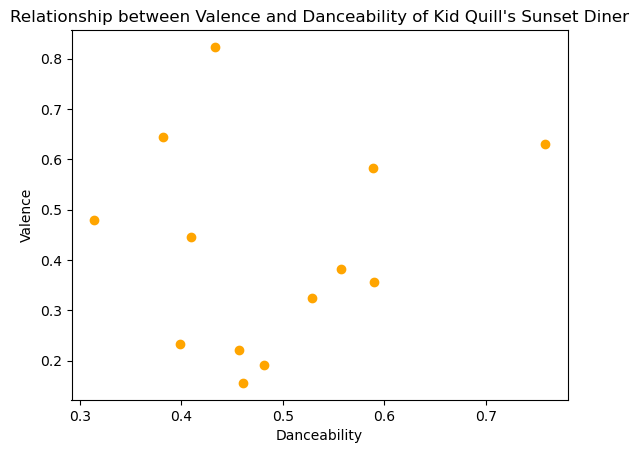

In [21]:
fig2, ax2 = plt.subplots()
ax2.scatter(x = sunset_df['danceability'], y = sunset_df['valence'], color = "orange")


ax2.set_title("Relationship between Valence and Danceability of Kid Quill's Sunset Diner")
ax2.set_xlabel('Danceability')
ax2.set_ylabel('Valence')

plt.show()

For Sunset Diner there is no clear correlation between danceability and valence the scatter plot shows data points strewn all over without any clear rhyme or reason

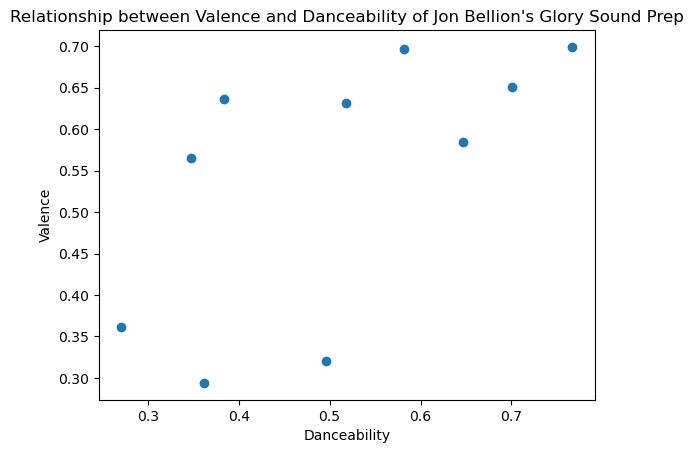

In [22]:
fig3, ax3 = plt.subplots()
ax3.scatter(x = gsp_df['danceability'], y = gsp_df['valence'])


ax3.set_title("Relationship between Valence and Danceability of Jon Bellion's Glory Sound Prep")
ax3.set_xlabel('Danceability')
ax3.set_ylabel('Valence')

plt.show()

For Glory Sound Prep this is a clear correlation betweem danceability and valence when one increases the other increases as as well with a few outliers that do not meet the criteria but overall there is a correlation

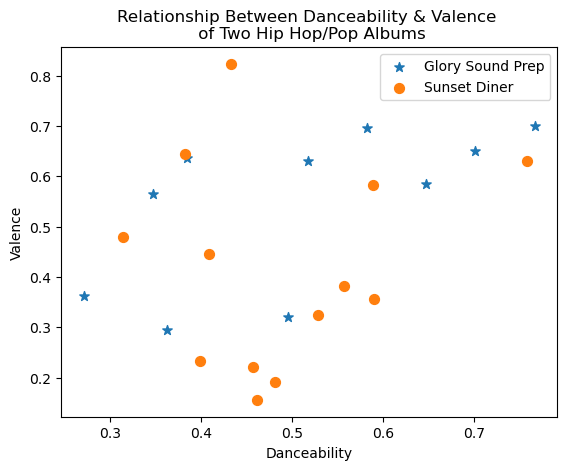

In [23]:
fig4, ax4 = plt.subplots()
ax4.scatter(x = gsp_df['danceability'], y = gsp_df['valence'], label = "Glory Sound Prep", marker = "*", s = 50.0)
ax4.scatter(x = sunset_df['danceability'], y = sunset_df['valence'], label = "Sunset Diner", s = 50.0)

ax4.set_title("Relationship Between Danceability & Valence \n of Two Hip Hop/Pop Albums")
ax4.set_xlabel('Danceability')
ax4.set_ylabel('Valence')
ax4.legend()


plt.show()

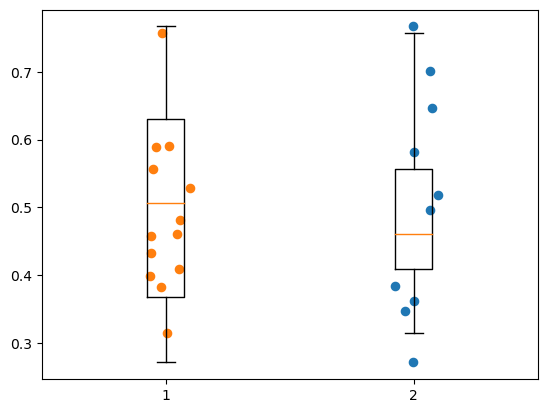

In [24]:
fig5, ax5 = plt.subplots()


sunset_xs = [1] * len(sunset_df['danceability'])
gsp_xs = [2] * len(gsp_df['danceability'])
# This code allows me to plot the x points of the scatter plot to the positions on the box plots

sunset_x_jitter = np.random.uniform(-.10, .10, len(sunset_xs))
gsp_x_jitter = np.random.uniform(-.10, .10, len(gsp_xs))
# This is allowing us to space out the dots on the x axis to allow easier visiability

ax5.boxplot(gsp_df['danceability'], positions = [1])
ax5.boxplot(sunset_df['danceability'], positions = [2])
# Creating boxplots for danceability of each of the albums tracks

ax5.scatter(gsp_xs + gsp_x_jitter, gsp_df['danceability'], s = 35.0)
ax5.scatter(sunset_xs + sunset_x_jitter, sunset_df['danceability'], s =35.0)
# Placing the scatter plot dots on the boxplots



plt.show()

In [25]:
result = stats.ttest_ind(sunset_df['danceability'],gsp_df['danceability'])

In [26]:
result.statistic

-0.31272077652771074

In [27]:
result.pvalue

0.7575771610265117

This TTest tells us that there are little to no differences between these two albums when it comes to danceability. The statistic value is close to 0, which means they're practically identical sets. The P value is much greater than.05, which means this is not a reliable data test and there is no correlation between the two.